#### 01Demo: Yeast Segmentation

In [1]:
import sys
import os
sys.path.append("../deeplab/")

import yaml
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

from config_yml import ExperimentOptions
from trainer.train import DeepCellModule
from postprocess.post_process_utils import post_process_panoptic

2023-03-28 09:20:15.568537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 09:20:15.704614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-28 09:20:15.704636: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-28 09:20:15.737480: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-28 09:20:16.459146: W tensorflow/stream_executor/platform/de

### 01. Config

In [2]:
mode = 'test' #train, evl, test
model_dir = "../../DY_Model_v1.0.0/checkpoint/"
train_dir = "../../DY_Model_v1.0.0/tf/train*.tfrecord"
eval_dir = "../../DY_Model_v1.0.0/tf/val*.tfrecord"
config_path = "../deeplab/configs/config_wl.yaml"
num_gpus = 0

### 02. Load Model

In [3]:
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)
configs.model_options.backbone.drop_path_keep_prob=1
configs.train_dataset_options.file_pattern=train_dir
configs.eval_dataset_options.file_pattern=eval_dir

cellmodel = DeepCellModule(mode, configs, num_gpus, model_dir=model_dir)

2023-03-28 09:20:17.816372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-28 09:20:17.816401: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-28 09:20:17.816427: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (393b80e4f273): /proc/driver/nvidia/version does not exist
2023-03-28 09:20:17.816676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


../../DY_Model_v1.0.0/checkpoint/
restoring or initializing model...
restored model from ../../DY_Model_v1.0.0/checkpoint/ckpt-100000.
restored from checkpoint: ../../DY_Model_v1.0.0/checkpoint/ckpt-100000


### 03. Read Image

Test your picture here

In [4]:
file_path = "../../DY_Model_v1.0.0/image/3306_REF_DIC_01_00.png"
img = imread(file_path)

### 04. Prediction

In [5]:
%%time
output = cellmodel.predict(img[:,:])

CPU times: user 3min 23s, sys: 8.52 s, total: 3min 32s
Wall time: 25.4 s


### 05. Plot result

In [6]:
post_ouput = output["panoptic_pred"][0].numpy()
post_ouput = post_process_panoptic(post_ouput)

In [8]:
imsave(os.path.join("../../", os.path.basename(file_path)), post_ouput)

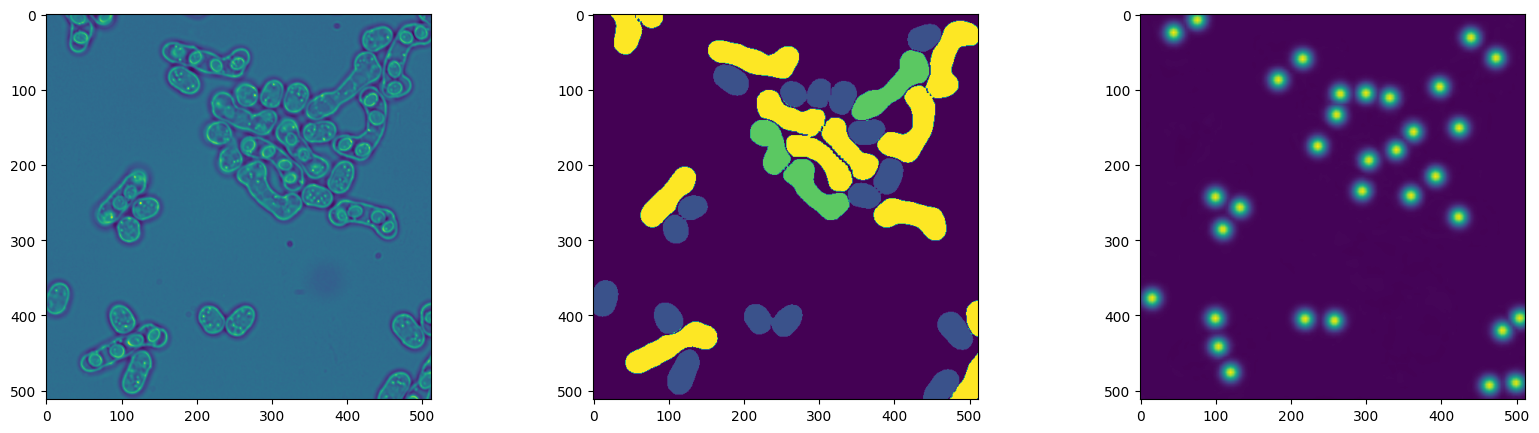

In [9]:
figs, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(img[:,:])
axs[1].imshow(output['panoptic_pred'][0])
axs[2].imshow(output['center_heatmap'][0])
# axs[3].imshow(post_ouput)

#### save model

In [ ]:
# signatures = cellmodel.__call__.get_concrete_function(cellmodel.get_input_spec())
# tf.saved_model.save(cellmodel, "../../model_dir/save2/", signatures=signatures)